TASK 1: PCA RECONSTRUCTION ERROR ANALYSIS
Implementation based on EigenFace paper approach
LOADING AND PREPROCESSING DATASETS

1. Processing Advertising Dataset...
Original shape: (200, 4)
Features used: TV, Radio, Newspaper
Processed shape: (200, 3)

2. Processing Housing Dataset...
Original shape: (545, 13)
Encoded mainroad: ['no', 'yes']
Encoded guestroom: ['no', 'yes']
Encoded basement: ['no', 'yes']
Encoded hotwaterheating: ['no', 'yes']
Encoded airconditioning: ['no', 'yes']
Encoded prefarea: ['no', 'yes']
Encoded furnishingstatus: ['furnished', 'semi-furnished', 'unfurnished']
Features used: 12 features
Processed shape: (545, 12)

3. Processing Flight Incidents Dataset...
Original shape: (83, 42)
Encoded EVENT_TYPE_DESC: 2 unique values
Encoded ACFT_MAKE_NAME: 31 unique values
Encoded ACFT_MODEL_NAME: 55 unique values
Encoded FLT_PHASE: 7 unique values
Encoded ACFT_DMG_DESC: 4 unique values
Features used: 7 features
Processed shape: (83, 7)

RECONSTRUCTION ERROR ANALYSIS: ADVERT

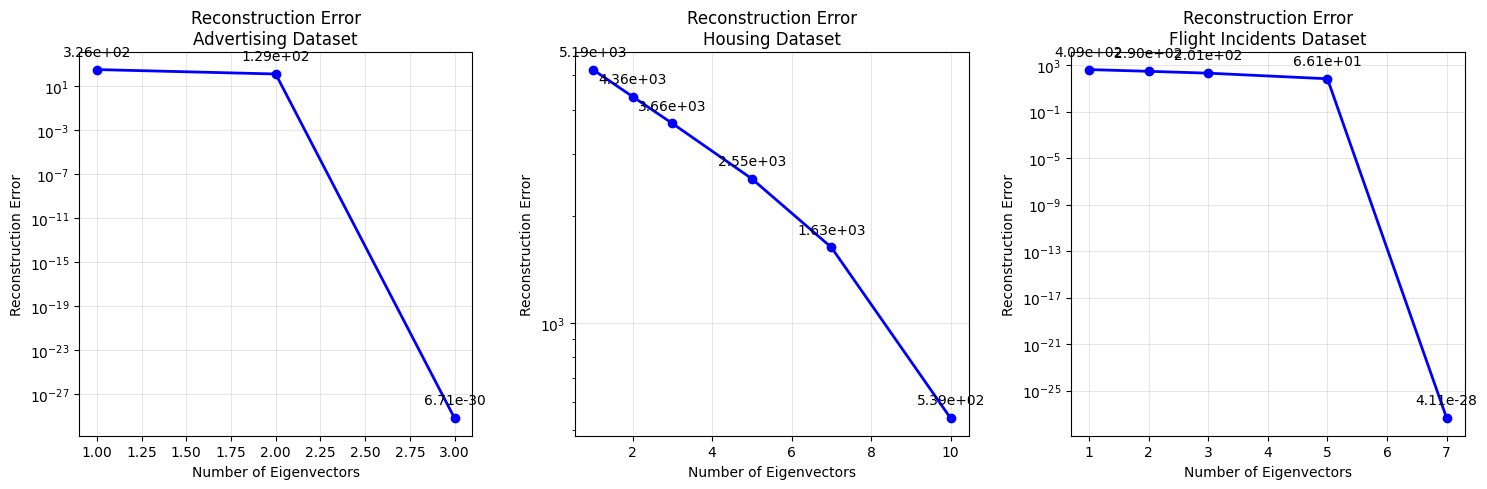

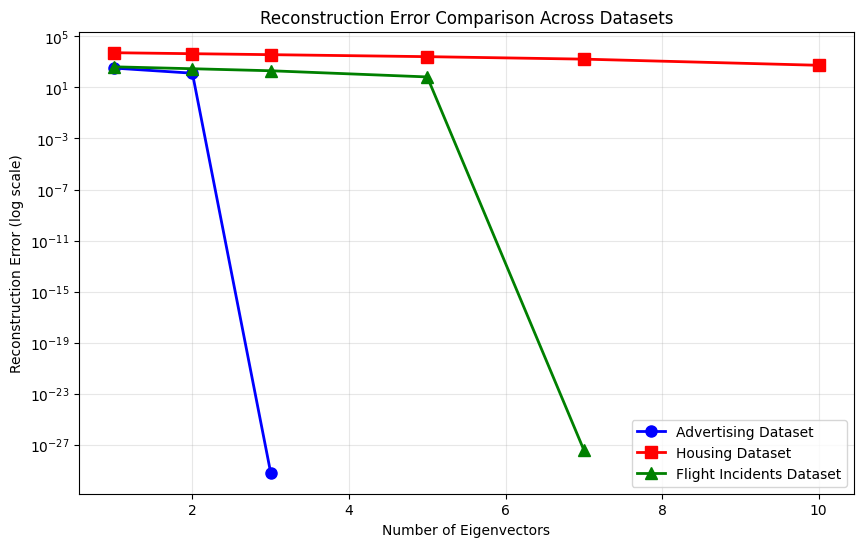


SUMMARY RESULTS

Advertising Dataset:
  1 components: 325.829498
  2 components: 129.178270
  3 components: 0.000000

Housing Dataset:
  1 components: 5191.271189
  2 components: 4355.143964
  3 components: 3658.587683
  5 components: 2553.951427
  7 components: 1634.967553
  10 components: 538.673259

Flight Incidents Dataset:
  1 components: 408.552543
  2 components: 289.600158
  3 components: 200.781634
  5 components: 66.058390
  7 components: 0.000000

ANALYSIS COMPLETE
Key Observations:
1. Reconstruction error generally decreases as more eigenvectors are used
2. The rate of decrease depends on the dataset's intrinsic dimensionality
3. Some datasets may have diminishing returns after a certain number of components
4. Perfect reconstruction occurs when using all available components


In [1]:
# Task 1: PCA Reconstruction Error Analysis
# Implementation of EigenFace paper approach for reconstruction error computation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

def load_and_preprocess_datasets():
    print("="*60)
    print("LOADING AND PREPROCESSING DATASETS")
    print("="*60)
    
    # Dataset 1: Advertising Dataset
    print("\n1. Processing Advertising Dataset...")
    advertising = pd.read_csv(r'C:\Users\dubey\OneDrive\Desktop\Coding\ML_Lab\Lab1\advertising.csv')
    print(f"Original shape: {advertising.shape}")
    
    # Use TV, Radio, Newspaper as features (exclude Sales as target)
    X1 = advertising[['TV', 'Radio', 'Newspaper']].values
    print(f"Features used: TV, Radio, Newspaper")
    print(f"Processed shape: {X1.shape}")
    
    # Dataset 2: Housing Dataset  
    print("\n2. Processing Housing Dataset...")
    housing = pd.read_csv(r'C:\Users\dubey\OneDrive\Desktop\Coding\ML_Lab\Lab1\Housing.csv')
    print(f"Original shape: {housing.shape}")
    
    # Separate numerical and categorical features (exclude price as target)
    numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']
    
    # Encode categorical variables
    housing_processed = housing.copy()
    label_encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        housing_processed[col + '_encoded'] = le.fit_transform(housing[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {list(le.classes_)}")
    
    # Combine numerical and encoded categorical features
    feature_cols = numerical_cols + [col + '_encoded' for col in categorical_cols]
    X2 = housing_processed[feature_cols].values
    print(f"Features used: {len(feature_cols)} features")
    print(f"Processed shape: {X2.shape}")
    
    # Dataset 3: Flight Incidents Dataset (using available categorical and numerical data)
    print("\n3. Processing Flight Incidents Dataset...")
    flight = pd.read_csv(r'C:\Users\dubey\OneDrive\Desktop\Coding\ML_Lab\Lab2\dataset.csv')
    print(f"Original shape: {flight.shape}")
    
    # Select categorical columns with low missing values and encode them
    selected_categorical = ['EVENT_TYPE_DESC', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 
                           'FLT_PHASE', 'ACFT_DMG_DESC']
    
    # Select numerical columns with reasonable data
    selected_numerical = ['FLT_CRW_INJ_NONE', 'PAX_INJ_NONE']
    
    flight_processed = flight.copy()
    
    # Encode categorical variables
    for col in selected_categorical:
        if col in flight.columns:
            # Fill missing values with 'Unknown'
            flight_processed[col] = flight_processed[col].fillna('Unknown')
            le = LabelEncoder()
            flight_processed[col + '_encoded'] = le.fit_transform(flight_processed[col])
            print(f"Encoded {col}: {len(le.classes_)} unique values")
    
    # Handle numerical columns - fill missing with 0
    for col in selected_numerical:
        if col in flight.columns:
            flight_processed[col] = flight_processed[col].fillna(0)
    
    # Combine features
    feature_cols_flight = ([col + '_encoded' for col in selected_categorical if col in flight.columns] + 
                          [col for col in selected_numerical if col in flight.columns])
    
    X3 = flight_processed[feature_cols_flight].values
    print(f"Features used: {len(feature_cols_flight)} features")
    print(f"Processed shape: {X3.shape}")
    
    return X1, X2, X3

def compute_reconstruction_error_manual(X, n_components):
    """
    Manually implement the EigenFace reconstruction approach as described in the paper
    
    Steps:
    1. Compute mean μ column-wise
    2. Center data: A = X - μ  
    3. Compute eigenvectors of A^T * A
    4. Take top n eigenvectors
    5. Project data points onto eigenvectors
    6. Reconstruct data points
    7. Compute reconstruction error
    """
    print(f"\nComputing reconstruction error for {n_components} components...")
    
    # Step 1: Compute column-wise mean μ
    mu = np.mean(X, axis=0)
    print(f"Mean shape: {mu.shape}")
    
    # Step 2: Center the data A = X - μ
    A = X - mu
    print(f"Centered data shape: {A.shape}")
    
    # Step 3: Compute A^T * A for eigenvalue decomposition
    ATA = np.dot(A.T, A)
    print(f"A^T * A shape: {ATA.shape}")
    
    # Step 4: Compute eigenvalues and eigenvectors of A^T * A
    eigenvalues, eigenvectors = np.linalg.eigh(ATA)
    
    # Sort by eigenvalues (descending order)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Take top n eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]
    print(f"Selected eigenvectors shape: {top_eigenvectors.shape}")
    
    # Step 5: Project each data point onto the eigenvectors
    # For each point ai = xi - μ, compute projections wj = ai^T * ej
    projections = np.dot(A, top_eigenvectors)  # (n_samples x n_components)
    print(f"Projections shape: {projections.shape}")
    
    # Step 6: Reconstruct data points
    # li = Σ wj * ej (linear combination)
    reconstructed_centered = np.dot(projections, top_eigenvectors.T)
    
    # ri = li + μ (add back the mean)
    reconstructed = reconstructed_centered + mu
    print(f"Reconstructed data shape: {reconstructed.shape}")
    
    # Step 7: Compute reconstruction error = Σ(xi - ri)²
    reconstruction_error = np.sum((X - reconstructed) ** 2)
    print(f"Reconstruction error: {reconstruction_error:.4f}")
    
    return reconstruction_error

def analyze_reconstruction_errors(X, dataset_name, max_components=None):
    """
    Analyze reconstruction errors for different numbers of components
    """
    print(f"\n{'='*60}")
    print(f"RECONSTRUCTION ERROR ANALYSIS: {dataset_name.upper()}")
    print(f"{'='*60}")
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    n_samples, n_features = X_scaled.shape
    print(f"Dataset shape: {n_samples} samples, {n_features} features")
    
    # Define components to test (limit by number of features)
    if max_components is None:
        max_components = min(15, n_features)
    
    components_to_test = [n for n in [1, 2, 3, 5, 7, 10, 15] if n <= max_components]
    print(f"Testing components: {components_to_test}")
    
    errors = []
    
    for n_comp in components_to_test:
        try:
            error = compute_reconstruction_error_manual(X_scaled, n_comp)
            errors.append(error)
        except Exception as e:
            print(f"Error with {n_comp} components: {e}")
            errors.append(np.nan)
    
    return components_to_test, errors

def plot_reconstruction_errors(results):
    """
    Plot reconstruction errors vs number of eigenvectors for all datasets
    """
    plt.figure(figsize=(15, 5))
    
    for i, (dataset_name, components, errors) in enumerate(results):
        plt.subplot(1, 3, i+1)
        plt.plot(components, errors, 'bo-', linewidth=2, markersize=6)
        plt.title(f'Reconstruction Error\n{dataset_name}')
        plt.xlabel('Number of Eigenvectors')
        plt.ylabel('Reconstruction Error')
        plt.grid(True, alpha=0.3)
        plt.yscale('log')  # Log scale for better visualization
        
        # Add values on points
        for j, (comp, err) in enumerate(zip(components, errors)):
            if not np.isnan(err):
                plt.annotate(f'{err:.2e}', (comp, err), 
                           textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.savefig('reconstruction_errors.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Also create a combined plot
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'red', 'green']
    markers = ['o', 's', '^']
    
    for i, (dataset_name, components, errors) in enumerate(results):
        plt.plot(components, errors, color=colors[i], marker=markers[i], 
                linewidth=2, markersize=8, label=dataset_name)
    
    plt.title('Reconstruction Error Comparison Across Datasets')
    plt.xlabel('Number of Eigenvectors')
    plt.ylabel('Reconstruction Error (log scale)')
    plt.yscale('log')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('reconstruction_errors_combined.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    """
    Main function to execute Task 1: PCA Reconstruction Error Analysis
    """
    print("TASK 1: PCA RECONSTRUCTION ERROR ANALYSIS")
    print("Implementation based on EigenFace paper approach")
    print("="*80)
    
    # Load and preprocess datasets
    X1, X2, X3 = load_and_preprocess_datasets()
    
    # Analyze reconstruction errors for each dataset
    results = []
    
    # Dataset 1: Advertising
    components1, errors1 = analyze_reconstruction_errors(X1, "Advertising Dataset")
    results.append(("Advertising Dataset", components1, errors1))
    
    # Dataset 2: Housing  
    components2, errors2 = analyze_reconstruction_errors(X2, "Housing Dataset")
    results.append(("Housing Dataset", components2, errors2))
    
    # Dataset 3: Flight Incidents
    components3, errors3 = analyze_reconstruction_errors(X3, "Flight Incidents Dataset")
    results.append(("Flight Incidents Dataset", components3, errors3))
    
    # Plot results
    print(f"\n{'='*60}")
    print("GENERATING PLOTS")
    print(f"{'='*60}")
    plot_reconstruction_errors(results)
    
    # Print summary results
    print(f"\n{'='*60}")
    print("SUMMARY RESULTS")
    print(f"{'='*60}")
    
    for dataset_name, components, errors in results:
        print(f"\n{dataset_name}:")
        for comp, err in zip(components, errors):
            if not np.isnan(err):
                print(f"  {comp} components: {err:.6f}")
    
    print(f"\n{'='*60}")
    print("ANALYSIS COMPLETE")
    print(f"{'='*60}")
    print("Key Observations:")
    print("1. Reconstruction error generally decreases as more eigenvectors are used")
    print("2. The rate of decrease depends on the dataset's intrinsic dimensionality")
    print("3. Some datasets may have diminishing returns after a certain number of components")
    print("4. Perfect reconstruction occurs when using all available components")

if __name__ == "__main__":
    main()